In [4]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [5]:
# file_path = "../eta-pi-data/merged_Eta.h5"
# file_path = "../eta-pi-data/merged_NCPi0_update.h5"
# file_path = '../eta-pi-data/eta-pi0.h5'
# file_path = '../eta-pi-data/NeutrinoML_TN_ts841090.h5'
# file_path = '../eta-pi-data/NeutrinoML_TN_ts656558.h5'
file_path = '../eta-pi-data/NeutrinoML_TN_ts491857.h5'

In [97]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))
    
    # If your data is nested, explore further
    # for key in f.keys():
    #     if isinstance(f[key], h5py.Group):
    #         print(f"  Subkeys in {key}:", list(f[key].keys()))

    # Example: print shape of a known dataset (replace 'points_data' with your actual key)
    if 'spacepoints_table' in f:
        print("Keys (datasets/groups) in HDF5 file:", list(f['spacepoint_table'].keys()))
        print(f"Shape of 'points_data': {f['points_data'].shape}")
        print(f"Type of 'points_data': {f['points_data'].dtype}")
    # Identify how labels/classes are stored
    if 'labels' in f:
        print(f"Shape of 'labels': {f['labels'].shape}")

    sp = f['spacepoint_table']

    # print(f['spacepoint_table/event_id'][:50])
    # print(f['spacepoint_table/event_id.seq_cnt'][:500])
    # print(f['spacepoint_table/spacepoint_id'][:50])

    current_index = [0, 0, 0]
    current_num_points = 0
    num_points = []
    print(len(sp['event_id']))
    for a in tqdm(sp['event_id'][:-1]):
        if a[0] == current_index[0] and a[1] == current_index[1] and a[2] == current_index[2]:
            current_num_points += 1
        else:
            # print(current_num_points)
            num_points.append(current_num_points)
            current_num_points = 1
            current_index = a
        # print(current_num_points)

# num_points = num_points[1:-1] # Remove first zero



Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
24501084


  5%|▌         | 1343990/24501083 [00:00<00:14, 1557415.89it/s]


KeyboardInterrupt: 

In [ ]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))

    pt = f['particle_table']
    ht = f['hit_table']
    sp = f['spacepoint_table']

    print(pt.keys())
    print(ht.keys())
    print(sp.keys())

    # print(pt['parent_id'][:])
    # print(pt['g4_id'][510:530])
    # print(pt['g4_pdg'][:])
    # print(pt['end_process'][510:530])
    # print(pt['start_process'][510:530])
    # print(ht['hit_id'])
    # print(sp['spacepoint_id'])
    # print(pt['event_id.seq_cnt'][:5])
    # print(ht['event_id.seq_cnt'][:5])
    # print(sp['event_id.seq_cnt'][:5])

    # print(sum(int(pt['g4_pdg'][:]==221)))
    indexes_221 = np.where(f['particle_table/g4_pdg'][:] == 22)[0]
    print(indexes_221)
    print(len(indexes_221))

    sp_events = sp['event_id.seq_cnt'][:, 0]
    pt_sequence_info = pt['event_id.seq_cnt'][:]
    pdg_info = pt['g4_pdg']
    parent_id = pt['parent_id']

    i = 0
    starting_index = 0
    total = 0
    gamma2_count = 0
    gamma_counts = []
    pi0_count = 0
    pip_count = 0
    pim_count = 0
    for event_id in tqdm(sp_events):
    # for event_id in tqdm(pt_sequence_info[:,0]):

        while pt_sequence_info[i,0] != event_id:
            starting_index += pt_sequence_info[i,1]
            i+=1

        if i>len(pt_sequence_info[:,0]):
            raise Exception('bad')

        num_particles = pt_sequence_info[i,1]

        primary_idx = np.where(parent_id[starting_index:starting_index+num_particles] == 0)[0]

        print(primary_idx)

        gamma_idx = np.where(pdg_info[starting_index+primary_idx] == 22)
        pi0_idx = np.where(pdg_info[starting_index+primary_idx] == 111)
        pip_idx = np.where(pdg_info[starting_index+primary_idx] == 211)[0]
        pim_idx = np.where(pdg_info[starting_index+primary_idx] == -211)[0]

        print(pdg_info[starting_index+primary_idx].squeeze(-1))

        print(gamma_idx)

        gamma_counts.append(len(gamma_idx))
        if len(gamma_idx) == 2:
            gamma2_count+=1
        if len(pi0_idx) > 0:
            pi0_count+=1
        if len(pip_idx) > 0:
            pip_count+=1
        if len(pim_idx) > 0:
            pim_count+=1
        total+=1
    print(f'total pt events: {len(pt_sequence_info)}')
    print(f'total sp events: {total}')
    print(f'2 photon events: {gamma2_count}')
    print(gamma_counts)

    print(pi0_count)
    print(pip_count)
    print(pim_count)


Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
<KeysViewHDF5 ['category', 'end_position', 'end_position_corr', 'end_process', 'end_wire_pos', 'end_wire_time', 'event_id', 'event_id.seq_cnt', 'g4_id', 'g4_pdg', 'instance', 'momentum', 'parent_id', 'start_position', 'start_position_corr', 'start_process', 'start_wire_pos', 'start_wire_time']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'integral', 'local_plane', 'local_time', 'local_wire', 'rms', 'tpc']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'position', 'spacepoint_id']>
[    1     8     9 ... 12483 12484 12485]
3966


  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:00<00:00, 827.38it/s]

[0 1 2]
[ 13  22 211]
[1]
[0 1 2 3]
[  13   22   22 2212]
[1 2]
[0 1 2 3]
[  22   22 2212 2112]
[0 1]
[0 1 2 3]
[  13   22 2212 2112]
[1]
[0 1 2 3 4]
[  13   22 -211  211 2212]
[1]
[0 1]
[  22 2212]
[0]
[0 1 2 3]
[  13   22   22 2112]
[1 2]
[0]
[22]
[0]
[0 1 2 3]
[  13   22   22 -211]
[1 2]
[0 1 2]
[  22   11 2212]
[0]
[0 1 2 3 4 5]
[  13   22   22 2212 2112 2112]
[1 2]
[0 1 2 3]
[  22   22 2112 2112]
[0 1]
[0 1]
[ 22 211]
[0]
[0 1 2 3]
[  13   22   22 2212]
[1 2]
[0 1 2 3]
[ -13   22   22 2212]
[1 2]
[0 1 2]
[  13   22 2212]
[1]
[0 1]
[22 22]
[0 1]
[0 1]
[22 22]
[0 1]
[0 1]
[22 22]
[0 1]
[0 1 2 3]
[  13   22   22 2212]
[1 2]
[0 1 2 3]
[  13   22   22 2112]
[1 2]
[0 1 2 3]
[  13   22   22 2212]
[1 2]
[0 1 2 3 4]
[  13   22 -211  211 2212]
[1]
[0 1 2 3]
[  22   22 2112 2212]
[0 1]
[0 1 2 3]
[2212 2112   22   22]
[2 3]
[0 1 2]
[  22   22 2112]
[0 1]
[0 1 2]
[  22   22 2212]
[0 1]
total pt events: 27
total sp events: 27
2 photon events: 18
[1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 

In [7]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))

    pt = f['particle_table']
    ht = f['hit_table']
    sp = f['spacepoint_table']
    edep = f['edep_table']
    event = f['event_table']

    print(pt.keys())
    print(ht.keys())
    print(sp.keys())

    # for key in pt.keys():
    #     print(pt[key])

    print(pt['parent_id'])
    # print(pt['g4_id'])
    # print(pt['g4_pdg'])
    # print(pt['end_process'])
    # print(pt['start_process'])
    # print(ht['hit_id'])
    # # print(ht)
    print(sp['spacepoint_id'])
    # print(pt['event_id.seq_cnt'][:5])
    # print(ht['event_id.seq_cnt'][:5])
    # print(sp['event_id.seq_cnt'][:5])

    # print(sum(int(pt['g4_pdg'][:]==221)))
    indexes_221 = np.where(f['particle_table/g4_pdg'][:] == 111)[0]
    print(len(indexes_221))

    indexes_221 = np.where(f['particle_table/parent_id'][:] == 0)[0]
    print(len(indexes_221))

    pdg_info = pt['g4_pdg']
    parent_id = pt['parent_id']

    i = 0
    starting_index = 0
    total = 0
    pi0_count = 0
    pip_count = 0
    pim_count = 0
    gamma2_count = 0
    for event_id in tqdm(sp_sequence_info[:,0]):

        while pt_sequence_info[i,0] != event_id:
            starting_index += pt_sequence_info[i,1]
            i+=1

        if i>len(pt_sequence_info[:,0]):
            raise Exception('bad')

        num_particles = pt_sequence_info[i,1]

        primary_idx = np.where(parent_id[starting_index:starting_index+num_particles] == 0)[0]

        # print(primary_idx)

        gamma_idx = np.where(pdg_info[starting_index:starting_index+num_particles] == 22)[0]
        pi0_idx = np.where(pdg_info[starting_index:starting_index+num_particles] == 111)[0]
        pip_idx = np.where(pdg_info[starting_index:starting_index+num_particles] == 211)[0]
        pim_idx = np.where(pdg_info[starting_index:starting_index+num_particles] == -211)[0]

        if len(gamma_idx) == 2:
            gamma2_count+=1
        if len(pi0_idx) > 0:
            pi0_count+=1
        if len(pip_idx) > 0:
            pip_count+=1
        if len(pim_idx) > 0:
            pim_count+=1
        total+=1
    print(f'total sp events: {total}')
    print(f'2 photon events: {gamma2_count}')

    print(pi0_count)
    print(pip_count)
    print(pim_count)

Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
<KeysViewHDF5 ['category', 'end_position', 'end_position_corr', 'end_process', 'end_wire_pos', 'end_wire_time', 'event_id', 'event_id.seq_cnt', 'g4_id', 'g4_pdg', 'instance', 'momentum', 'parent_id', 'start_position', 'start_position_corr', 'start_process', 'start_wire_pos', 'start_wire_time']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'integral', 'local_plane', 'local_time', 'local_wire', 'rms', 'tpc']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'position', 'spacepoint_id']>
<HDF5 dataset "parent_id": shape (12499, 1), type "<i4">
<HDF5 dataset "spacepoint_id": shape (26331, 1), type "<i4">
0
94


NameError: name 'sp_sequence_info' is not defined

In [13]:
import pandas as pd

file_path = '../eta-pi-data/NeutrinoML_TN_ts656558.h5'

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)

def flatten(xss):
    return [x for xs in xss for x in xs]

with h5py.File(file_path, 'r') as f:

    # Read in as pandas
    event_table = f['event_table']
    sp_table = f['spacepoint_table']

    sp_ids = sp_table['event_id.seq_cnt'][:,0]


    data = {key: event_table[key][:] for key in event_table.keys()}
    # print(data)
    merged_array = np.hstack([data[key] for key in data.keys()])
    # print(merged_array)
    columns = flatten([[key for _ in range(np.shape(data[key])[1])] for key in data.keys()])
    # print(columns)
    df = pd.DataFrame(merged_array, columns = columns)
    print(df.columns)
    print(df[df['event_id.seq_cnt'].iloc[:,0].isin(sp_ids)]['nu_vtx'])

Index(['event_id', 'event_id', 'event_id', 'event_id.seq_cnt', 'event_id.seq_cnt', 'is_cc', 'lep_energy', 'nu_dir', 'nu_dir', 'nu_dir', 'nu_energy', 'nu_pdg', 'nu_vtx', 'nu_vtx', 'nu_vtx',
       'nu_vtx_corr', 'nu_vtx_corr', 'nu_vtx_corr', 'nu_vtx_wire_pos', 'nu_vtx_wire_pos', 'nu_vtx_wire_pos', 'nu_vtx_wire_time'],
      dtype='object')
        nu_vtx      nu_vtx       nu_vtx
0   116.767166  -99.220665   973.979248
2    57.857540  -21.148348   456.512360
6   185.021545  -90.380501   101.252167
8   244.400375  -38.921387   348.625793
9   244.837524    6.767525   969.565308
10  130.789429   64.873222   472.974457
13  143.906067   99.567429   238.169937
15   19.429966  112.823090   294.303955
16  171.984940    3.840022   237.846664
17  158.909180   31.900778   117.731201
20    4.730677  -82.622520   883.027649
28  155.662628   54.796696   727.646729
30  197.223877   61.996754   857.814087
31  232.687820   26.798363    32.489056
34  196.430359  -69.702240    84.127541
37  236.691528  -95

In [105]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))

    output = {}

    for group in f.keys():
        grp = f[group]
        print(f'{group}: {grp.keys()}')
        for key in grp.keys():
            print(grp[key])

            if key == 'event_id.seq_cnt':
                output[group] = len(grp[key][:])

    print(output)

Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
edep_table: <KeysViewHDF5 ['energy', 'energy_fraction', 'event_id', 'event_id.seq_cnt', 'g4_id', 'hit_id']>
<HDF5 dataset "energy": shape (88435, 1), type "<f4">
<HDF5 dataset "energy_fraction": shape (88435, 1), type "<f4">
<HDF5 dataset "event_id": shape (88435, 3), type "<i4">
<HDF5 dataset "event_id.seq_cnt": shape (27, 2), type "<i8">
<HDF5 dataset "g4_id": shape (88435, 1), type "<i4">
<HDF5 dataset "hit_id": shape (88435, 1), type "<i4">
event_table: <KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'is_cc', 'lep_energy', 'nu_dir', 'nu_energy', 'nu_pdg', 'nu_vtx', 'nu_vtx_corr', 'nu_vtx_wire_pos', 'nu_vtx_wire_time']>
<HDF5 dataset "event_id": shape (68, 3), type "<i4">
<HDF5 dataset "event_id.seq_cnt": shape (68, 2), type "<i8">
<HDF5 dataset "is_cc": shape (68, 1), type "<i4">
<HDF5 dataset "lep_energy": shape 

Keys (datasets/groups) in HDF5 file: ['Eta', 'NCPi0']
Eta
(array([ 146,    0,    0,    0,    0, 2719,    0,   90,    0,   45]), array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]))
NCPi0
(array([2748,    0,  134,    0,    0,    0,    0,    0,    0,  118]), array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]))


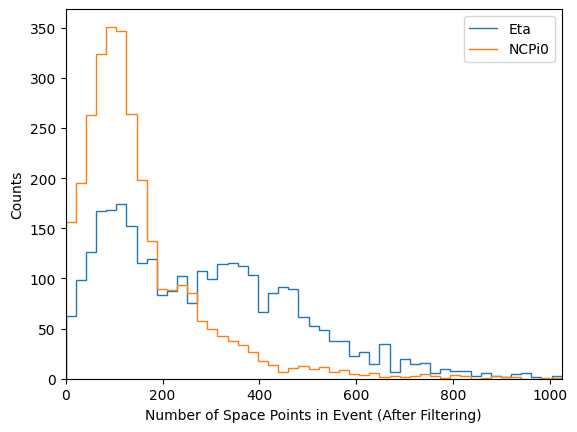

In [144]:
file_path = '../eta-pi-data/eta-pi0-testing.h5'

with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))

    fig, ax= plt.subplots()
    bins = np.linspace(0,1024,50)
    bin_centers = (bins[:-1] + bins[1:])/2
    for group in f.keys():

        print(group)

        grp = f[group]

        num_points = grp['sequence_info_filtered'][:,2]
        category = grp['sequence_info_filtered'][:,6]

        print(np.histogram(category, 10))

        hist = np.histogram(num_points, bins)[0]
        ax.stairs(hist, bins, label=group)

ax.set_xlabel(f'Number of Space Points in Event (After Filtering)')
ax.set_ylabel(f'Counts')
ax.set_xlim(min(bins), max(bins))
ax.legend()
plt.show()

In [ ]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))
    print("Keys (datasets/groups) in HDF5 file:", list(f['spacepoint_table'].keys()))

    print(f['edep_table'].keys())
    print(f['hit_table'].keys())
    print(f['particle_table'].keys())


    # # print(f['edep_table']['energy_fraction'][:10])
    # print(f['hit_table']['integral'][:10])
    print(f['hit_table']['hit_id'][:10000])
    # print(f['hit_table']['local_plane'][:10])

    # print(np.count_nonzero(f['spacepoint_table/event_id.seq_cnt'][:20, 0] == f['hit_table/event_id.seq_cnt'][:20, 0]))
    print(len(f['hit_table/event_id.seq_cnt']))
    print(len(f['spacepoint_table/event_id.seq_cnt']))
    print(f['spacepoint_table']['hit_id'][:1500])
    print(f['spacepoint_table']['spacepoint_id'][:10])

    f_sub = f['spacepoint_table/event_id.seq_cnt'][:]
    h_sub = f['hit_table/event_id.seq_cnt'][:]
    h_all = f['hit_table/hit_id'][:]

    # The following tests whether the hit_ids for a single event are just counting up in order
    test = True
    starting_index = 0
    for event_index, num_points in tqdm(h_sub):

        if not np.all(h_all[starting_index:starting_index+num_points].transpose() == range(num_points)):
            print('failed')

        starting_index+=num_points

    # print(f['spacepoint_table/event_id'][f['spacepoint_table/metadata'][:, 0]])
    # print(f['spacepoint_table/hit_id'][f['spacepoint_table/metadata'][:, 0]])

Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
Keys (datasets/groups) in HDF5 file: ['event_id', 'event_id.seq_cnt', 'hit_id', 'metadata', 'position', 'sequence_info', 'spacepoint_id']
<KeysViewHDF5 ['energy', 'energy_fraction', 'event_id', 'event_id.seq_cnt', 'g4_id', 'hit_id']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'integral', 'local_plane', 'local_time', 'local_wire', 'rms', 'sequence_info', 'tpc']>
<KeysViewHDF5 ['category', 'end_position', 'end_position_corr', 'end_process', 'end_wire_pos', 'end_wire_time', 'event_id', 'event_id.seq_cnt', 'g4_id', 'g4_pdg', 'instance', 'momentum', 'parent_id', 'start_position', 'start_position_corr', 'start_process', 'start_wire_pos', 'start_wire_time']>
[[  0]
 [  1]
 [  2]
 ...
 [912]
 [913]
 [914]]
25427
25288
[[257 357 848]
 [259 354 848]
 [253 362 849]
 ...
 [ 53 593  -1]
 [ 53 595  -1]
 [ 52 597  -1]

100%|██████████| 25427/25427 [00:01<00:00, 17524.04it/s]


In [5]:
with h5py.File(file_path, 'r') as f:

    print(f.keys())

    print(f['Eta'].keys())

<KeysViewHDF5 ['Eta', 'NCPi0']>
<KeysViewHDF5 ['point_info_centered', 'point_info_filtered', 'sequence_info_all', 'sequence_info_filtered']>
